## 1.
Si $x_0=3$ y
$$x_n = (5x_{n-1}+7) \mod 200$$

**a)** encuentre $x_1,...,x_{100}$

**b)** el tamaño del ciclo (si lo tiene)

**c)** calcule el estadístico $\chi^2$

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sympy import *
from datetime import datetime
import time

In [32]:
def GNCongruMix(x0, a, m, c, lim):
    xn = x0
    list = []
    for i in range(lim):
        xn = (a * xn + c) % m
        un = xn / m
        list.append(un)
        #print("u_{} = {}".format(i+1, un))
        print("%d\t %d\t %.4f\t"%(i+1,xn,un))

    return list


x0 = 3
a = 5
m = 200
c = 7
lim = 100
list = GNCongruMix(x0, a, m, c, lim)
#for i in range(len(list)):
 #   print("u_{} = {}".format(i+1, list[i]))

def ciclos(lista):
    xf=0
    xi=0
    for i in range(len(lista)):
        for j in range(i+1, len(lista)):
            if lista[i]==lista[j]:
                return str(j-i)
    return "No esta repetido en este momento"
print("El tamaño del ciclo es")
ciclos(list)

1	 22	 0.1100	
2	 117	 0.5850	
3	 192	 0.9600	
4	 167	 0.8350	
5	 42	 0.2100	
6	 17	 0.0850	
7	 92	 0.4600	
8	 67	 0.3350	
9	 142	 0.7100	
10	 117	 0.5850	
11	 192	 0.9600	
12	 167	 0.8350	
13	 42	 0.2100	
14	 17	 0.0850	
15	 92	 0.4600	
16	 67	 0.3350	
17	 142	 0.7100	
18	 117	 0.5850	
19	 192	 0.9600	
20	 167	 0.8350	
21	 42	 0.2100	
22	 17	 0.0850	
23	 92	 0.4600	
24	 67	 0.3350	
25	 142	 0.7100	
26	 117	 0.5850	
27	 192	 0.9600	
28	 167	 0.8350	
29	 42	 0.2100	
30	 17	 0.0850	
31	 92	 0.4600	
32	 67	 0.3350	
33	 142	 0.7100	
34	 117	 0.5850	
35	 192	 0.9600	
36	 167	 0.8350	
37	 42	 0.2100	
38	 17	 0.0850	
39	 92	 0.4600	
40	 67	 0.3350	
41	 142	 0.7100	
42	 117	 0.5850	
43	 192	 0.9600	
44	 167	 0.8350	
45	 42	 0.2100	
46	 17	 0.0850	
47	 92	 0.4600	
48	 67	 0.3350	
49	 142	 0.7100	
50	 117	 0.5850	
51	 192	 0.9600	
52	 167	 0.8350	
53	 42	 0.2100	
54	 17	 0.0850	
55	 92	 0.4600	
56	 67	 0.3350	
57	 142	 0.7100	
58	 117	 0.5850	
59	 192	 0.9600	
60	 167	 0.8350	
61	 42	 0.2100	
62

'8'

## 2.

Dada la función $f(x) = -4x^6 + 5x^2 - x + 1$:

**a)** Calcule el área bajo la curva usando el método de Monte Carlo generando 1.000 y 1.000.000 puntos $(x,y)$ aleatorios. Para ello use sus propios generadores congruenciales de numeros pseudoaleatorios uniformes $U(0,1)$, tal que genere puntos $(x,y)$ para el rango $x = [-1,1]$ y $y =[0,max(f(x))]$.<br>
**b)** Grafique la función y los puntos $(x,y)$ aleatorios generados.<br>
**c)** Calcule el error en comparación con el valor de la solución analítica.


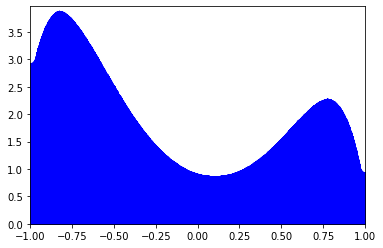

Montecarlo= 4.192308899562366
Integral= 4.190476190476191
Error= -0.001832709086174944


In [33]:
def funcion(x):
    return -4*math.pow(x,6)+5*math.pow(x,2)- x + 1

x_limite_min = -1.0
x_limite_max = 1.0
cant_pasos = 100000 
y_limite_min = 0
y_limite_max = y_limite_min
for i in range(cant_pasos):
    x = x_limite_min + (x_limite_max - x_limite_min) * float(i) / cant_pasos
    y = funcion(x)
    if y < y_limite_min: y_limite_min = y
    if y > y_limite_max: y_limite_max = y

aux_area = (x_limite_max - x_limite_min) * (y_limite_max - y_limite_min)
cant_puntos = 1000000
cont = 0
x_adentro=[]
y_adentro=[]
x_afuera=[]
y_afuera=[]
for j in range(cant_puntos):
    x = x_limite_min + (x_limite_max - x_limite_min) * random.random()
    y = y_limite_min + (y_limite_max - y_limite_min) * random.random()
    if x>=-1 and x<=1 and y <= funcion(x):
        cont += 1
        x_adentro.append(x)
        y_adentro.append(y)
    else:
        x_afuera.append(x)
        y_afuera.append(y)

area_montecarlo = aux_area * float(cont) / cant_puntos


init_printing() 
x = Symbol('x')
integral=Integral((-4*x**6+5*x**2 - x + 1), (x, -1, 1))
Eq(integral, integral.doit())
analitica=float(integral.doit())
error = analitica - area_montecarlo


xx = np.arange(x_limite_min,x_limite_max,(x_limite_max-x_limite_min)/1000)
yy=[]

for xi in xx:
    yy.append(funcion(xi))
plt.plot(xx,yy,color="blue")
plt.plot(x_adentro, y_adentro, color="blue",linewidth=0, marker='o' )
plt.plot(x_afuera, y_afuera, color="white",linewidth=0, marker='o' )
plt.ylim(y_limite_min, y_limite_max)
plt.xlim(x_limite_min, x_limite_max)
plt.grid(True) 
plt.show()

print("Montecarlo= {}".format(area_montecarlo))
print("Integral= {}".format(analitica))
print("Error= {}".format(error))

## 3. Trans Inversa
Escriba un programa para generar $n$ valores a partir de la funcion de masa de probabilidad $p_1 = 1/4$ para $x_1$, y $p_2 = 3/4$ para $x_2$ <br>
**a)** Sea $n = 100$, ejecute el programa y determine la proporcion de valores que sean iguales a 2.<br>
**b)** Repita (a) con $n = 1000$.<br>
**c)** Repita (a) con $n = 10000$.


In [34]:
prob=[1/4,3/4]
def ge_Congruencial_mixto(n):
    a=25214903917
    c=11 
    m=(2**48)-1
    xn=datetime.now().microsecond
    numeros=[]
    for i in range (n):
        xn=(a*xn+c)%(m)
        numeros.append(xn/m)
    return numeros

def prob_acumulada(prob):
    aux=0
    p_acu=[0]
    for i in range(len(prob)):
        aux=aux+prob[i]
        p_acu.append(aux)
    return p_acu
    
def trans_inversa(prob,n):    
    Ui=ge_Congruencial_mixto(n)
    p_acu=prob_acumulada(prob)
    cont=0
    for i in range(len(Ui)):
        for j in range(1,len(p_acu)):
            if(Ui[i]>=p_acu[j-1] and Ui[i]<=p_acu[j]):
                if(j==2):
                    cont+=1
    return cont


print("n:100= {}".format(trans_inversa(prob,100)))
print("n:1000= {}".format(trans_inversa(prob,1000)))
print("n:10000= {}".format(trans_inversa(prob,10000)))

n:100= 72
n:1000= 733
n:10000= 7438


## 4. 
Se tiene un sistema de línea de espera con un servidor y capacidad infinita (Modelo de Colas G/G/1) (Ver [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ), en el cual tanto los tiempos de llegada entre clientes, así como los tiempos de atención del servidor se comportan como  variables aleatorias generadas de distribuciones de probabilidad exponenciales, en donde en promedio llegan A clientes por minuto al sistema y el servidor atiende en promedio B clientes por minuto. La simulación inicia en el tiempo $t=0$ y se deja de permitir el ingreso de mas clientes en el sistema en el tiempo $T=100$.

Para analizar el sistema Ud. debe usar la implementación de acuerdo con el Modelo de Colas G/G/1 visto en clase (diapositivas 42 y 43 [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ). 

Para la generación de las variables aleatorias con distribución exponencial debe usar el método de la inversión para variables aleatorias continuas usando generadores congruenciales mixtos. _Ayuda: El método de inversión para variables aleatorias continuas debe usar la función inversa $F^{-1}(p)$ de la distribución de probabilidad acumulada de la distribución exponencial en donde el valor $p$ proviene del generador congruencial mixto_.

Para la generación de las variables aleatorias de los tiempos entre las llegadas de clientes (variable aleatoria $X$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = A$ a partir de un generador congruencial _Numerical Recipes_ (i.e. $a = 1664525$, $c = 1013904223$, $m=2^{32}$) y semilla $X_0 = 987654321$.

Para la generación de las variables aleatorias de los tiempos de atención del servidor (variable aleatoria $Y$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = B$ a partir de un generador congruencial Turbo Pascal (i.e. $a = 134775813$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 123456789$.

Con su implementación para $A=2.5$ y $B=6$ por favor responda lo siguiente:

**a)** Tiempo promedio de los clientes en el sistema.

**b)** Tiempo promedio de los clientes en la cola.

**c)** Tiempo transcurrido desde $T$ hasta que el último cliente abandona el sistema.

**d)** Número máximo de clientes en el sistema durante la simulación.

**e)** Total de clientes que pasaron por el sistema

**f)** Grafique el número de clientes en el sistema (eje Y) con respecto al tiempo (eje X).


In [35]:

A=2.5+2.5
B=3
Xa=987654321
Xa2=123456789


def generarU():
    global Xa
    a=1664525
    c=1013904223
    m=2**32
    Xo=Xa
    Xn=(a*Xo+c)%m
    ui=Xn/m
    Xa=Xn
    return ui


def generarU2():
    global Xa2
    a=134775813
    c=1
    m=2**32
    Xo=Xa2
    Xn=(a*Xo+c)%m
    ui=Xn/m
    Xa2=Xn
    return ui

def exponencial(lamda):
    if lamda==A:
        U=generarU()
        return (-1/lamda) * math.log(1-U)
    if lamda==B:
        U=generarU2()
        return (-1/lamda) * math.log(1-U)

t=0
tsuc=0
Nll=0
Ns=0
n=0
Tsuc_tLL=2**16
Tsuc_ts=2**16
M=2**16
LL=np.zeros(1000)
S=np.zeros(1000)
Serv=np.zeros(1000)
T=100
nmax=0

def llegada(tsuc):
    global n,Nll,Tsuc_tLL,Tsuc_ts,t,Ns,nmax
    t=tsuc
    n=n+1
    if n>nmax:
        nmax=n
    Nll=Nll+1
    LL[Nll]=t
    X=exponencial(A)
    if t+X<T:
        Tsuc_tLL=t+X
    if n==1:
        Y=exponencial(B)
        Tsuc_ts=t+Y
        Serv[Ns+1]=Y

def servidor(tsuc):
    global t,n,Tsuc_tLL,Tsuc_ts,Ns
    t=tsuc
    n=n-1
    Ns=Ns+1
    S[Ns]=t
    if n>0:
        Y= exponencial(B) 
        Tsuc_ts=t+Y
        Serv[Ns]=Y
        
X=exponencial(A)

if(X>T):
    Tp=0
    t_med_sistema=0
    t_med_cola=0
else:
    llegada(X)
    while(Tsuc_tLL!=M or Tsuc_ts!=M):
        if Tsuc_tLL<Tsuc_ts:
            tsuc=Tsuc_tLL
            Tsuc_tLL=M
            llegada(tsuc)
        if Tsuc_ts<Tsuc_tLL:
            tsuc=Tsuc_ts
            Tsuc_ts=M
            servidor(tsuc)
    Tp=max(0,t-T)
    acumulado1=0
    acumulado2=0
    ind=0
    while(ind<Nll):
        acumulado1=acumulado1+S[ind]-LL[ind]
        acumulado2=acumulado2+S[ind]-LL[ind]-Serv[ind]
        ind=ind+1
    t_med_sistema=acumulado1/Nll
    t_med_cola=acumulado2/Nll

print("Tiempo promedio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo promedio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde  T  hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema durante la simulación: ",nmax)


Tiempo promedio de los clientes en el sistema:  35.838427721639675
Tiempo promedio de los clientes en la cola:  35.49956185471476
Tiempo transcurrido desde  T  hasta que el último cliente abandona el sistema:  65.40776831503743
Número máximo de clientes en el sistema durante la simulación:  193


## 5.
Use su implementación del juego de la vida de Conway en NetLogo inicializando una reticula de 11 filas y 11 columnas con el siguiente patrón:

<img src="conway0.png" height="200" width="200">

**a)** Copie el código utilizado en NetLogo del juego de la vida de Conway.
ADJUNTO NETLOGO

**b)** Ilustre el patrón de la reticula en cada iteración hasta la numero 3.
#### Primera
<img src="unitera.png" height="200" width="200">

#### Segunda
<img src="doitera.png" height="200" width="200">

#### En la 3ra iteracion
<img src="parcial5.png" height="200" width="200">

#### En la 5ta iteracion
<img src="parcial5.png" height="200" width="200">

